# Introduction à l'apprentissage automatique: TP3 - Exercice 2 

<br>

### Reconnaissance de chiffres manuscrits

<br>

La cellule ci-dessous permet de charger 10000 images de chiffres manuscrits extraits de la célèbre base de données MNIST décrite __[ici](https://www.openml.org/d/554)__. La base originale contient 70000 images de taille 28x28 pixels, mais on restreint le nombre d'images afin de garder des temps de calcul raisonnables dans ce TD. On utilise 9000 observations comme base d'apprentissage, et on réserve 1000 observations comme base de test.

Les 28x28=784 caractéristiques sont les niveaux de gris en chaque pixel. Les caractéristiques seront normalisées à des valeurs entre 0 et 1.


In [4]:
from sklearn import datasets, neighbors, linear_model, metrics
%matplotlib inline 

# Mnist database: (il faut quelques dizaines de secondes pour charger la base)
# les données sont décrites ici: https://www.openml.org/d/554
size_images=(28,28)
X_digits, y_digits = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_digits=X_digits[:10000,:]/255. # on normalise le niveau de gris 8 bits entre 0 et 1
y_digits=y_digits[:10000]

n_samples = len(X_digits)
print("nombre total d'observations (apprentissage + test): %d" % n_samples)

n_features = len(X_digits[0])
print("nombre de caractéristiques par observation: %d" % n_features)

X_train = X_digits[: 9000]
y_train = y_digits[: 9000]
X_test = X_digits[9000 :]
y_test = y_digits[9000 :]
print("nombre d'observations dans la base d'apprentissage: %d" %len(X_train))
print("nombre d'observations dans la base de test: %d" %len(X_test))


nombre total d'observations (apprentissage + test): 10000
nombre de caractéristiques par observation: 784
nombre d'observations dans la base d'apprentissage: 9000
nombre d'observations dans la base de test: 1000


La cellule suivante définit une fonction qui permet d'afficher les 150 premières images de la base de test, ainsi que la classe véritable et la classe déterminée par l'algorithme de classification (passées en argument de la fonction). Nous nous servirons de cette fonction plus tard.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],size_images),cmap='gray_r')
        if y_pred[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('classe predite / classe réelle')
    plt.show();

La cellule suivante effectue une classification au plus proche voisin (`n_neighbors=1`) de la base des chiffres manuscrits extraite de MNIST, et affiche le résultat de la classification de 150 images.

__Question 1__. A quoi correspondent les temps de calcul affichés? Les erreurs vous semblent-elles qualitativement explicables? Notez le score de précision (proportion d'observations correctement classées). 

CPU times: total: 31.2 ms
Wall time: 69.7 ms
CPU times: total: 1.14 s
Wall time: 488 ms
KNN score: 0.928000


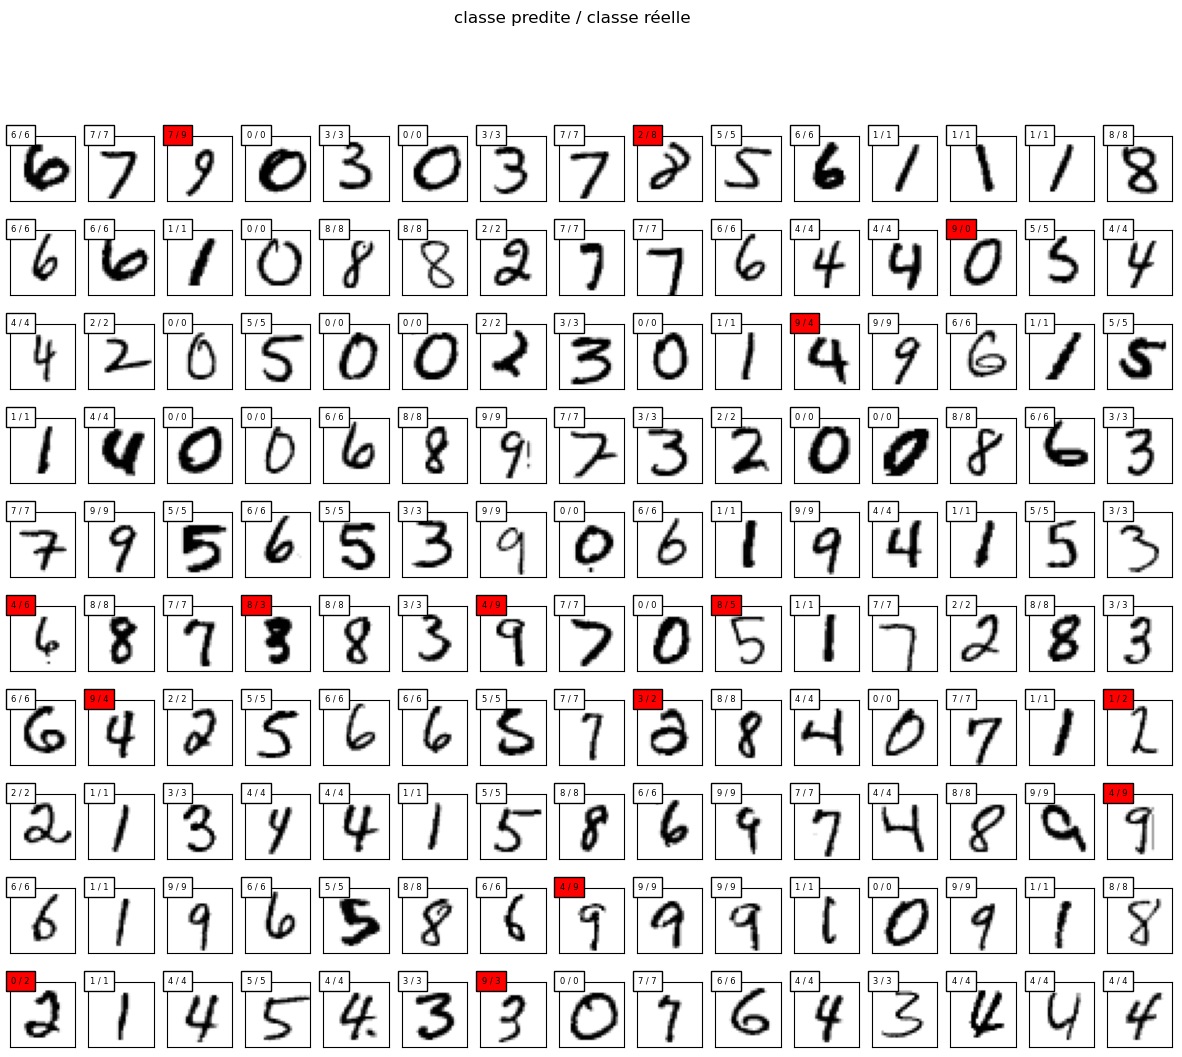

In [6]:
# classification au plus proche voisin et affichage
knn = neighbors.KNeighborsClassifier(n_neighbors=1) 
%time knn.fit(X_train, y_train)
%time y_pred_nn = knn.predict(X_test)
print('KNN score: %f' % metrics.accuracy_score(y_test, y_pred_nn))
affichage_150_images(X_test,y_test,y_pred_nn)        


<font color=red>
   
Le Wall time est le temp de request I/O, qui le user vais experimenter.
Par contre, le temp de CPU est just le temp que le process reste dans le CPU.

</font>

__Question 2__. Quelles sont les informations fournies par `classification_report` et `confusion_matrix` du module `metrics` ? 


In [ ]:
# votre code (voir l'exercice 1):
from sklearn.metrics import confusion_matrix, classification_report

<font color=red>

Réponse:


</font>

__Question 3__. Comparez aux résultats obtenus par 

- la classification naïve bayésienne gaussienne décrite dans la [documentation scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
    
-  à la régression logistique, décrite dans la [documentation scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  
Comparez également les temps de calcul.

In [16]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score

gnb = naive_bayes.GaussianNB()
scores = cross_val_score(gnb, X_train, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
%time gnb.fit(X_train, y_train)
%time y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
print("score: %0.3f" % score)
# votre code pour le classifieur naif Gaussien:


score moyen de validation croisée: 0.572 (+/- 0.023)
CPU times: total: 141 ms
Wall time: 285 ms
CPU times: total: 31.2 ms
Wall time: 95.5 ms
score: 0.589


score moyen de validation croisée: 0.900 (+/- 0.019)
CPU times: total: 1 s
Wall time: 1.77 s
CPU times: total: 0 ns
Wall time: 1.8 ms
score: 0.913


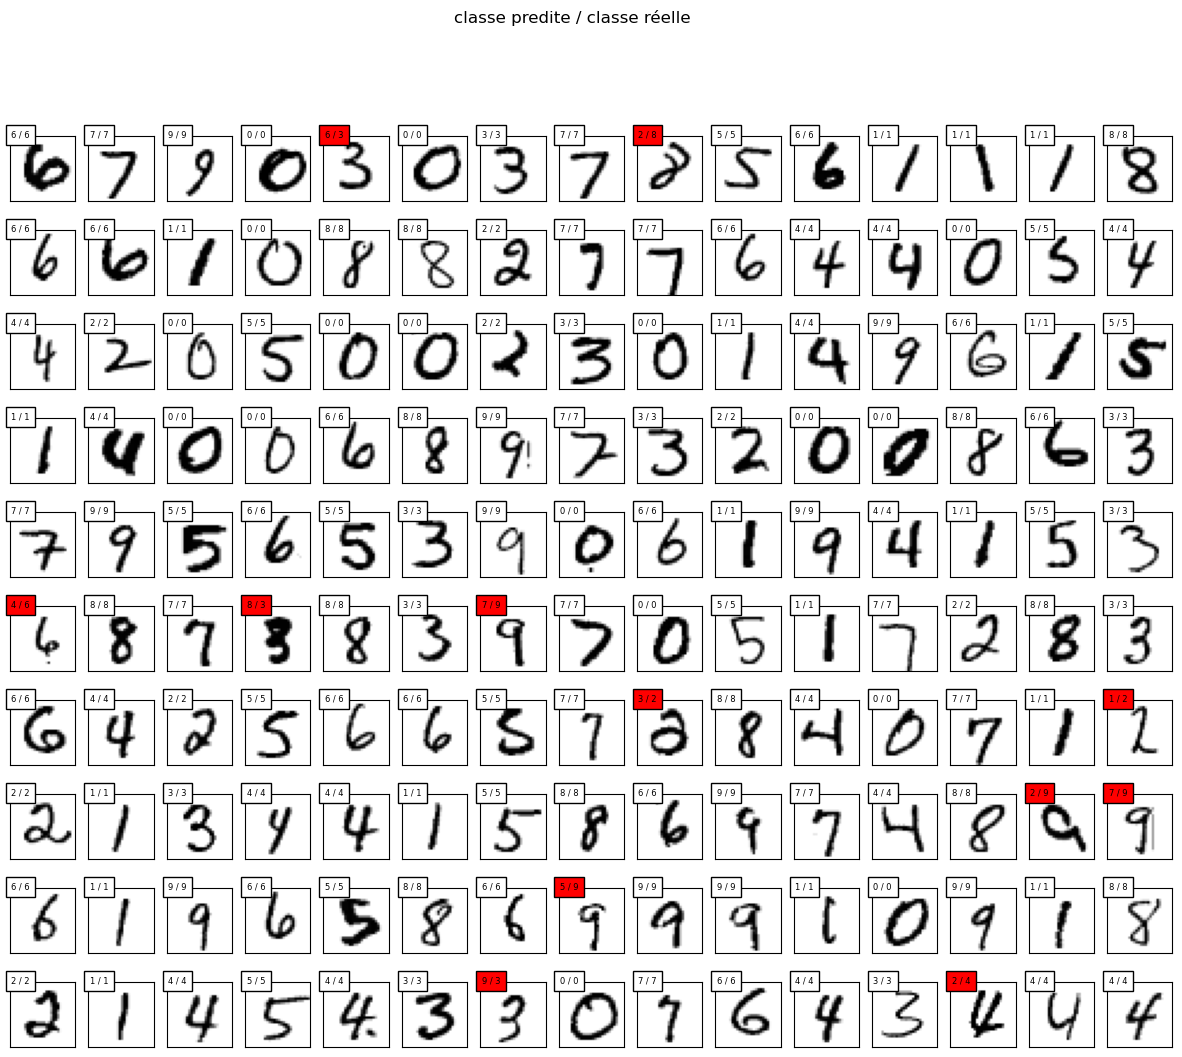

In [18]:
from sklearn import linear_model
RL = linear_model.LogisticRegression(max_iter=500)
scores = cross_val_score(RL, X_train, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
%time RL.fit(X_train, y_train)
%time y_pred = RL.predict(X_test)
score = RL.score(X_test, y_test)
print("score: %0.3f" % score)

affichage_150_images(X_test,y_test,y_pred)        

<font color=red>

Réponse:
    
</font>


__Remarque__: les méthodes modernes arrivent à des précisions supérieures à 99% (sur la base MNIST entière)
Voir les "error rates" sur: http://yann.lecun.com/exdb/mnist/

